## **Creating New Columns using existing columns**

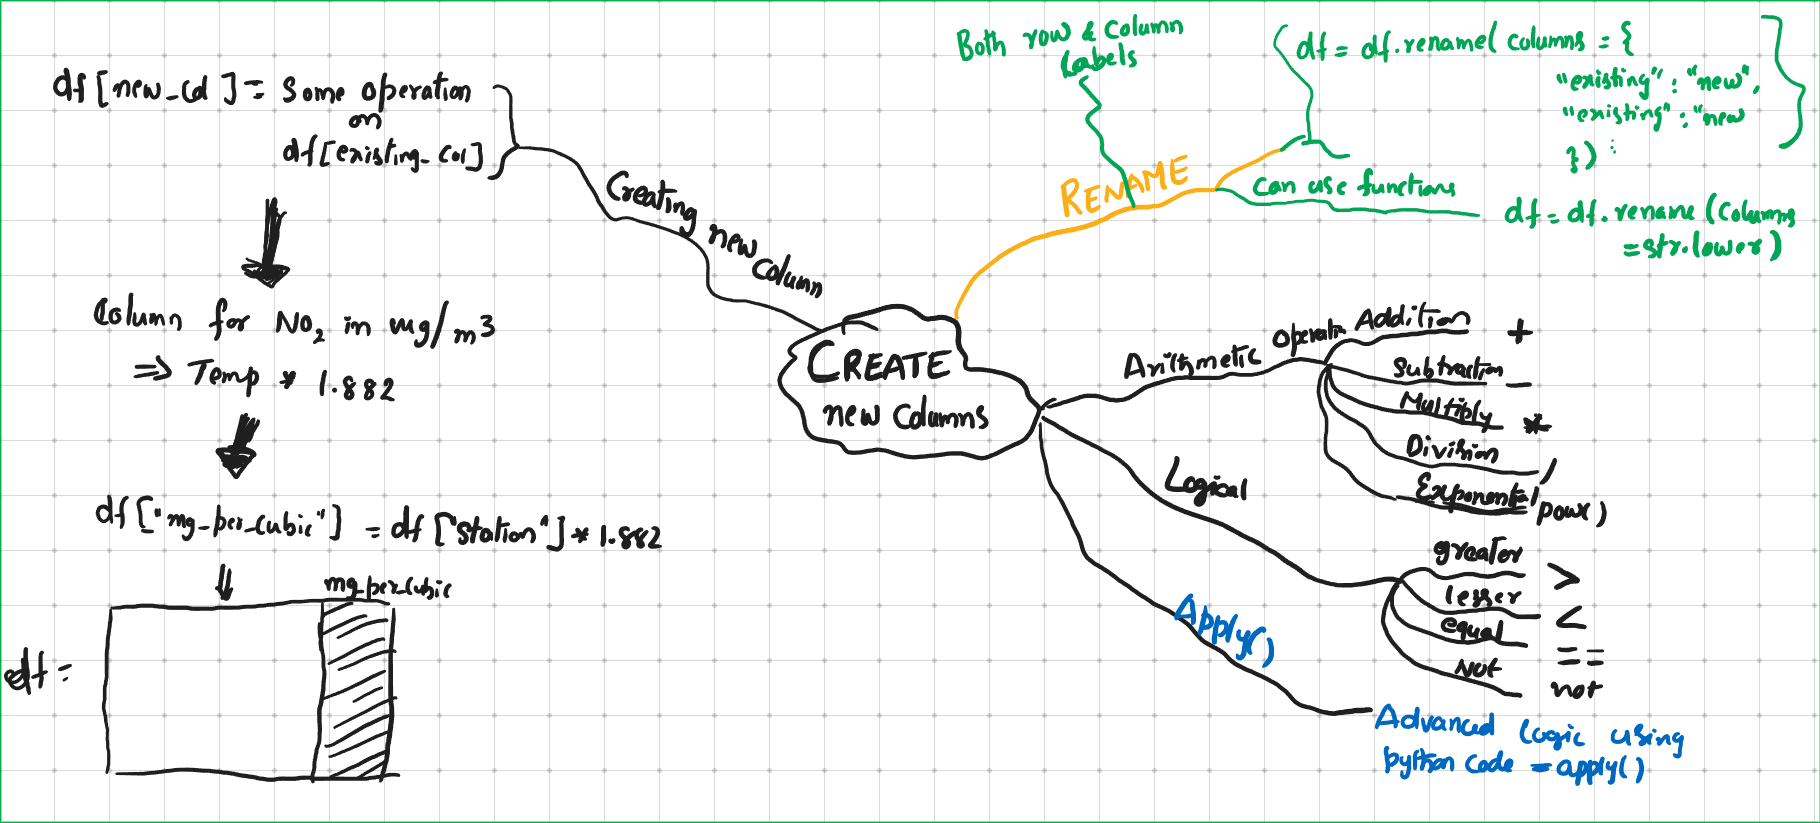

In [1]:
import pandas as pd

In [2]:
air_quality = pd.read_csv("Data/air_quality_no2.csv", index_col = 0, parse_dates = True)
air_quality

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [3]:
air_quality['london_mg_per_cubic'] = air_quality['station_london'] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [4]:
air_quality['ratio_paris_antwerp'] = air_quality['station_paris'] / air_quality['station_antwerp']
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [5]:
air_quality = air_quality.rename(columns = {
    "station_antwerp": "BETR801",
    "station_paris": "FR04014",
    "station_london": "London Westminster"
})

In [6]:
air_quality.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [7]:
air_quality = air_quality.rename(columns = str.lower)
air_quality.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## **Calculate Summary Statistics**
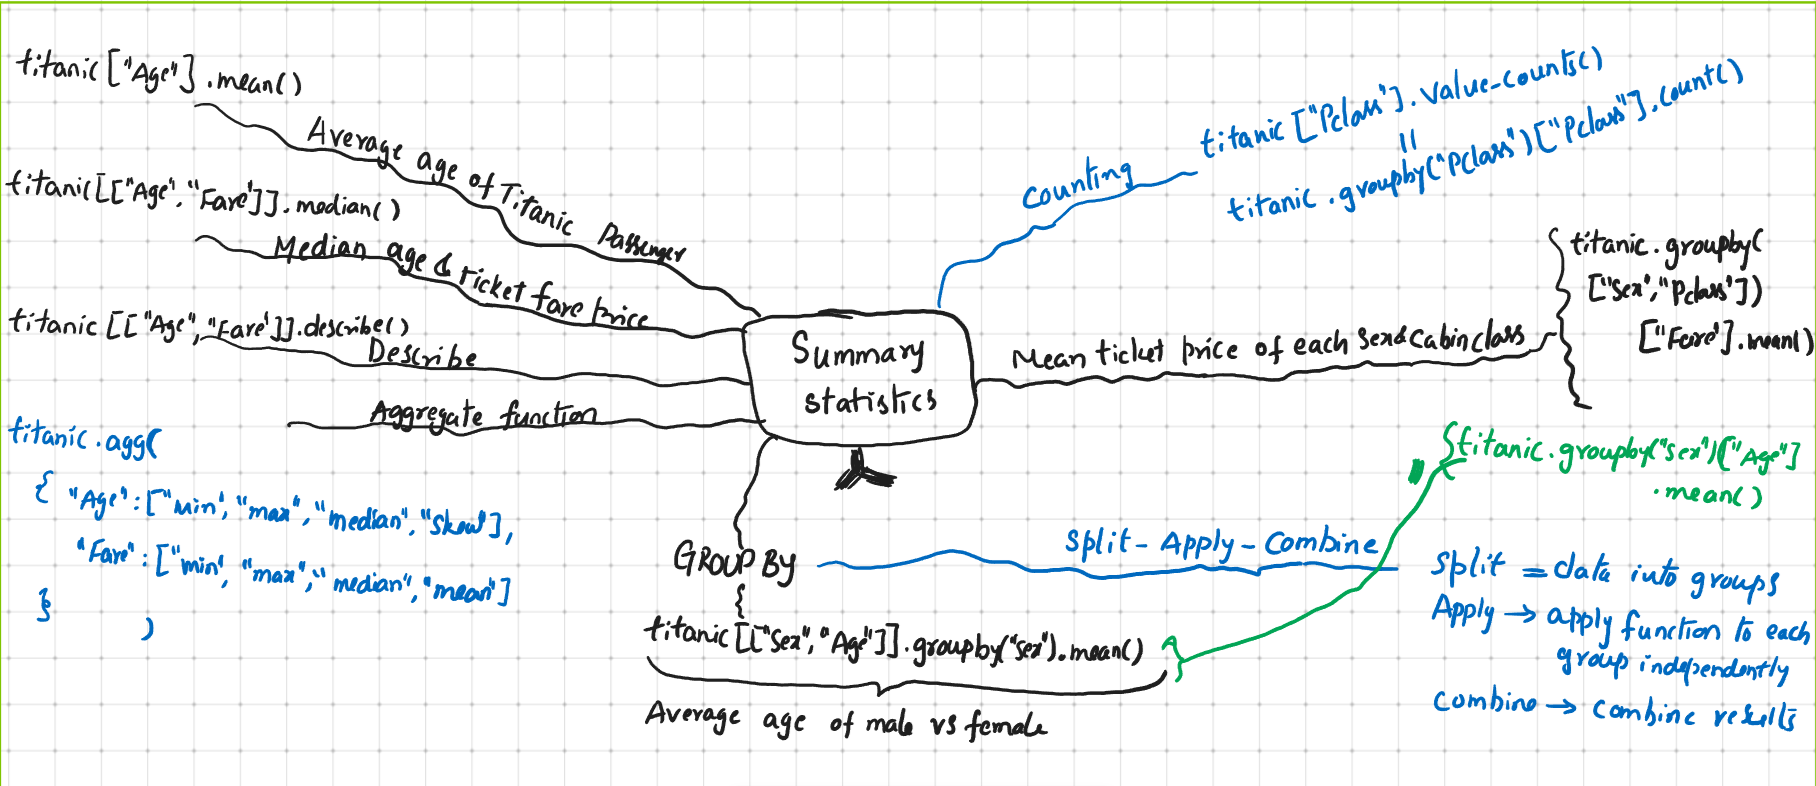


In [9]:
titanic = pd.read_csv("Data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic['Age'].mean()

29.69911764705882

In [11]:
titanic[['Age','Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [12]:
titanic[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### **Aggregate Function**

In [13]:
titanic.agg(
    {
        "Age": ["min","max","mean","skew"],
        "Fare": ["min","max","mean","median"]
    }
)


,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
skew,0.389108,NaN
median,NaN,14.454200


#### **Groupby**

In [14]:
titanic[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [15]:
titanic.groupby('Sex').mean(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [16]:
titanic.groupby('Sex')['Age'].mean(numeric_only = True)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [18]:
titanic.groupby(['Sex','Pclass'])['Fare'].mean() # Group by Multiple Columns

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

#### **Counting**

In [19]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [20]:
titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64